# R kernel

In [5]:
suppressMessages({
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggpubr)
library(cowplot)
library(rstatix)
library(reshape2)
library(Seurat)
library(ggnewscale)
library(RColorBrewer)
})

In [1]:
mytheme = function(){
theme_bw() +
theme(axis.text.x=element_text(size=6,color='black'),
    axis.text.y=element_text(size=6,color="black"),
    axis.title.y=element_text(size=6,color="black"),
    axis.title.x=element_text(size=6,color="black"),
    #axis.ticks.x=element_blank(),
    axis.ticks.length=unit(.02, "in"),
    axis.line = element_line(color = "black", linewidth = 0.25),
    axis.ticks = element_line(color = "black", linewidth = 0.25),
    strip.text.x = element_text(size = 6,margin = margin(0.08,0,0.08,0, "cm")),
    strip.text.y = element_text(size = 6,margin = margin(0,0.08,0,0.08, "cm")),
    strip.background=element_rect(linewidth=0.25),
    legend.text=element_text(size=5,color="black"),
    legend.title=element_text(size=5,color="black"),
    legend.key.width=unit(0.2,'cm'),
    legend.key.height=unit(0.2,'cm'),
    legend.box.margin=margin(0,0,0,2),
    legend.box.spacing = unit(0, "pt"),
    panel.spacing = unit(0.1, "cm"),
    plot.title = element_text(size=6),
    panel.border = element_rect(linewidth=0.25,color="black"),
    panel.grid = element_blank()
)
}

## Fig.S2E

In [2]:
sc_rds = readRDS("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/SC_data/SC_anno/scRNA_harmony_subtype_20240823.rds")

In [3]:
marker_gene_celltype = c(
    'KRT10','KRT1',
    "MLANA","DCT", 
    "CDH19","MPZ",
    'DCD',"SCGB2A2",
    "DCN","COL1A1",
    "PECAM1","CLDN5",
    "TAGLN","MYL9",
    "CD3D","CD3E",
    "NKG7","GNLY",
    "MS4A1","CD79A",
    "JCHAIN","MZB1",
    "LYZ","AIF1",
    "TPSAB1","TPSB2")

celltype_color = c(
    "Keratinocytes" ="#CCFF00FF", 
    "Melanocytes" = "#FF4A46",
    "Schwann cells" = "#A30059",
    "Sweat gland cells" = "#006FA6",
    "Fibroblasts" = "#8FB0FF",
    "Endothelial cells" ="#B79762",
    "Smooth muscle cells" ="#6B7900",
    "T cells" = "#63FFAC",
    "NK cells" = "#9467BD" ,
    "B cells" = "#FF34FF",
    "Plasma cells" ="#FF7F0EFF",
    "Macrophage/DC" = "#008941",
    "Mast cells" = "#6A3A4C"
)

In [8]:
plot1 = DotPlot(sc_rds, features=c(marker_gene_celltype), group.by='celltype',dot.scale = 2, cols = c("lightgrey", "#99000D")) +
    labs(x="",y="") +
    mytheme() + 
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))

In [9]:
all_stats <- sc_rds@meta.data %>%
  group_by(celltype) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

In [10]:
all_stats$percentage = round(all_stats$percentage, digits = 2)
all_stats$celltype = factor(all_stats$celltype, levels=rev(names(celltype_color)))

In [14]:
plot2 = ggplot(all_stats, aes(x=celltype, y=count, fill=celltype)) +
    geom_bar(stat = "identity",width=0.8) + 
    geom_text(aes(label = paste0(scales::comma(count)," (",percentage,"%)"), y = 0), vjust = 0.5, hjust=0, size=1.8) +
    guides(fill = guide_legend(override.aes = list(size=0.5), ncol = 1, title = 'Cell type', reverse = TRUE)) +
    labs(y='Number of cells', x='') +
    scale_fill_manual(values=celltype_color) +
    scale_y_continuous(labels = scales::scientific_format()) +
    coord_flip() +
    mytheme() +
    theme(legend.position ='none')

png 
  2

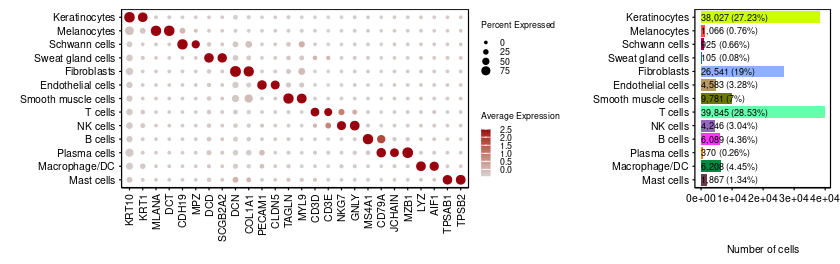

In [15]:
options(repr.plot.width =7 ,repr.plot.height =2.2)
plot_grid(plot1,plot2, align='h', rel_widths = c(4.3,2))

pdf("../../figures/SC_celltype_dotplot_cellnumber_barplot.pdf",w=7,h=2.2)
plot_grid(plot1,plot2, align='h', rel_widths = c(4.3,2))
dev.off()

# Python kernel

In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
import matplotlib.backends.backend_pdf as pdf_backend
import warnings
warnings.filterwarnings('ignore')
import importlib

import utils_20250718
importlib.reload(utils_20250718)
from utils_20250718 import *

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
ST_adata = sc.read_h5ad('/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Cellbin_h5ad_raw/All_samples_Cellbin_filter_gene200_add_anno_dist.h5ad')

## Fig.S2A

In [2]:
metadata_raw = pd.read_csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Cellbin_h5ad_raw/Merge_all_samples_raw.csv",index_col=0)

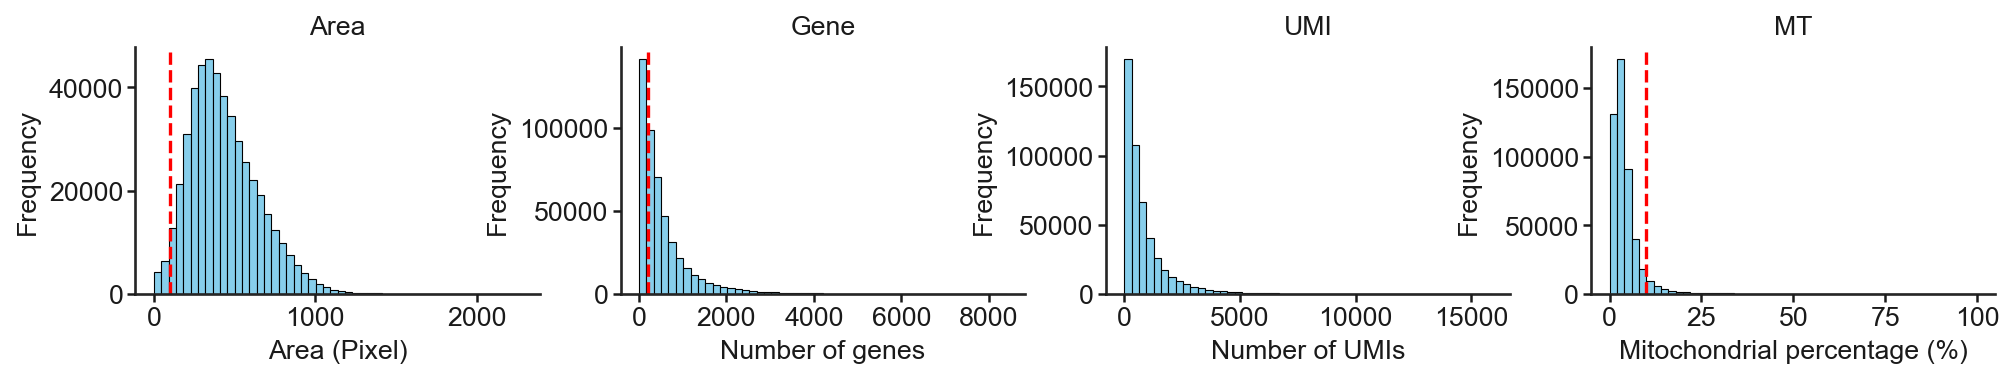

In [3]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 2))

ax1.hist(metadata_raw["area"], bins=50, edgecolor='black', alpha=1, color='skyblue', linewidth=0.5)
ax1.set_title('Area')
ax1.set_xlabel('Area (Pixel)')
ax1.set_ylabel('Frequency')
ax1.axvline(x=100, color='red', linestyle='--')

ax2.hist(metadata_raw["n_genes_by_counts"], bins=50, edgecolor='black', alpha=1, color='skyblue', linewidth=0.5)
ax2.set_title('Gene')
ax2.set_xlabel('Number of genes')
ax2.set_ylabel('Frequency')
ax2.axvline(x=200, color='red', linestyle='--')

ax3.hist(metadata_raw["total_counts"], bins=50, edgecolor='black', alpha=1,  color='skyblue', linewidth=0.5)
ax3.set_title('UMI')
ax3.set_xlabel('Number of UMIs')
ax3.set_ylabel('Frequency')

ax4.hist(metadata_raw["pct_counts_MT"], bins=50, edgecolor='black', alpha=1, color='skyblue', linewidth=0.5)
ax4.set_title('MT')
ax4.set_xlabel('Mitochondrial percentage (%)')
ax4.set_ylabel('Frequency')
ax4.axvline(x=10, color='red', linestyle='--')

In [4]:
metadata_filter = pd.read_csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Cellbin_h5ad_raw/All_samples_Cellbin_filter_gene200_add_anno_dist.csv", index_col=0)

Text(0, 0.5, 'Frequency')

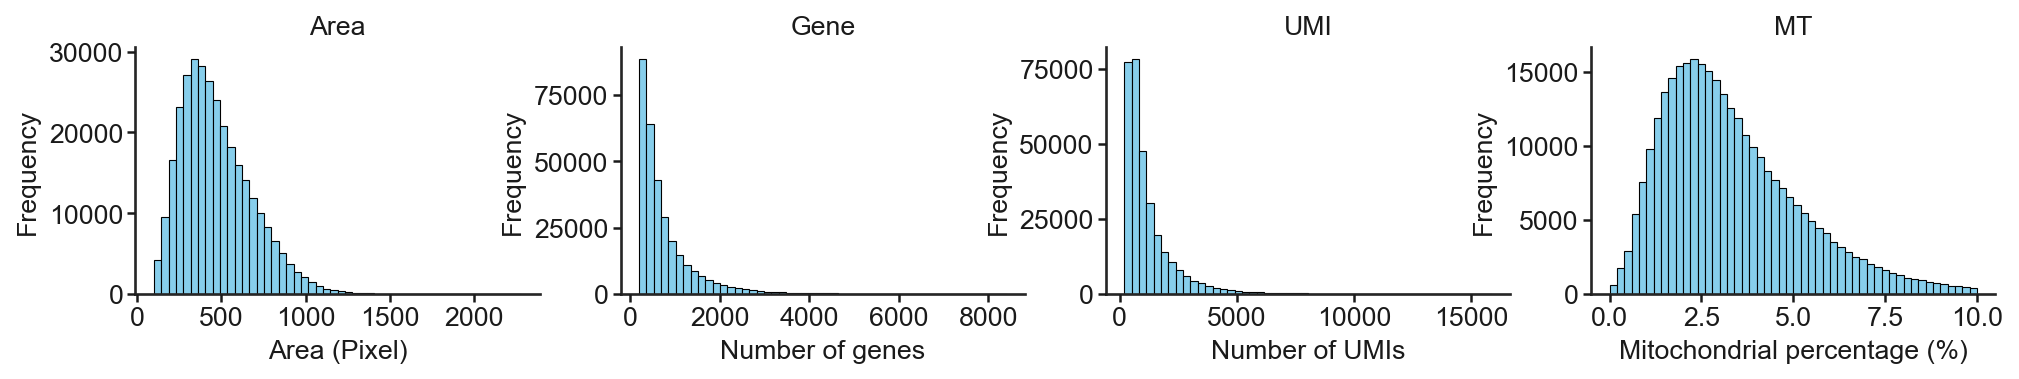

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 2))

ax1.hist(metadata_filter["area"], bins=50, edgecolor='black', alpha=1, color='skyblue', linewidth=0.5)
ax1.set_title('Area')
ax1.set_xlabel('Area (Pixel)')
ax1.set_ylabel('Frequency')

ax2.hist(metadata_filter["n_genes_by_counts"], bins=50, edgecolor='black', alpha=1, color='skyblue', linewidth=0.5)
ax2.set_title('Gene')
ax2.set_xlabel('Number of genes')
ax2.set_ylabel('Frequency')

ax3.hist(metadata_filter["total_counts"], bins=50, edgecolor='black', alpha=1,  color='skyblue', linewidth=0.5)
ax3.set_title('UMI')
ax3.set_xlabel('Number of UMIs')
ax3.set_ylabel('Frequency')

ax4.hist(metadata_filter["pct_counts_MT"], bins=50, edgecolor='black', alpha=1, color='skyblue', linewidth=0.5)
ax4.set_title('MT')
ax4.set_xlabel('Mitochondrial percentage (%)')
ax4.set_ylabel('Frequency')

## Fig.S2B

In [3]:
samples = ["HC1","HC2",'HC3','HC4',"DLE1","DLE2","DLE3","DLE4","DLE5","SLE1","SLE2","SLE3","SLE4","SLE5","SLE6"]

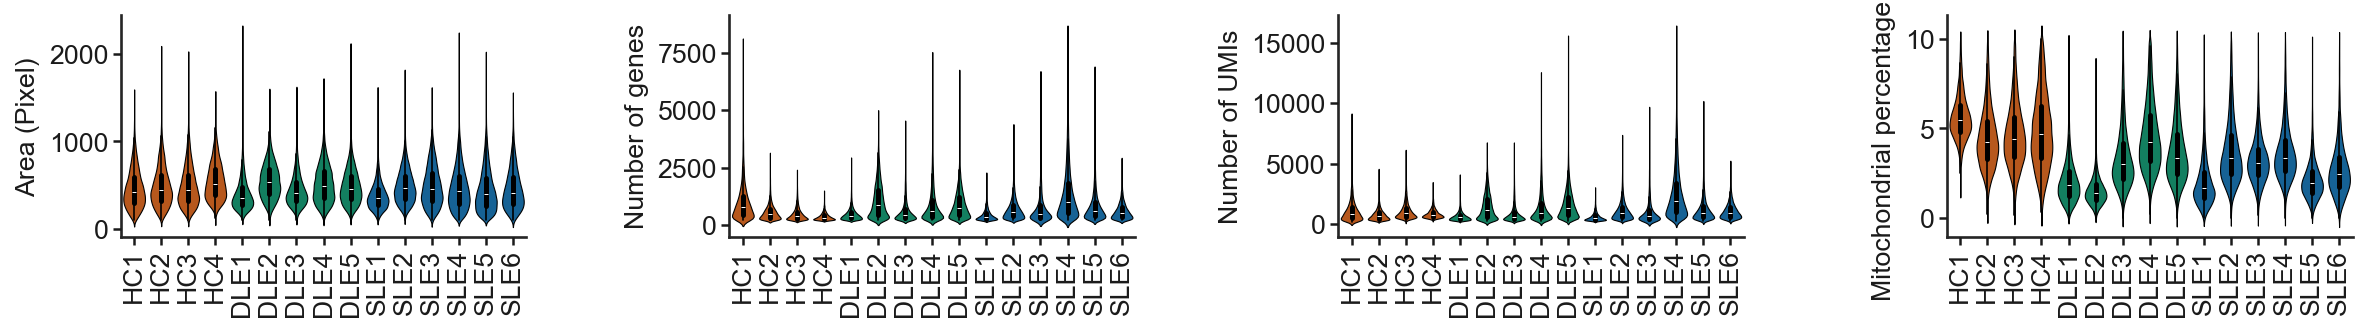

In [16]:
palette = {'HC' : '#d05204', 'DLE' : '#019167', 'SLE' : '#0166aa'}
def plot_violin(data, y_list, y_labs):   
    num_plots = len(y_list)
    fig, axes = plt.subplots(1, num_plots, figsize=(4.5*num_plots, 1.8))
    
    for i, (y, ax) in enumerate(zip(y_list, axes)):
        sns.violinplot(data=data,x="sample", y=y, scale='width',order=samples,color='skyblue',  linewidth=0.5, edgecolor='black', 
                        ax=ax, palette = palette, hue = 'group', legend=False)
        ax.tick_params(axis='x', rotation=90) 
        ax.set_xlabel("")
        ax.set_ylabel(y_labs[i])
        #ax.tick_params(axis='both', which='both', width=1)
    
    plt.subplots_adjust(wspace=0.5)
y_list = ["area","n_genes_by_counts", "total_counts", "pct_counts_MT"]
y_labs = ['Area (Pixel)', 'Number of genes', 'Number of UMIs','Mitochondrial percentage (%)']
plot_violin(metadata_filter, y_list, y_labs)
plt.show()

## Fig.S2C

In [17]:
KC_celltype_order = ["Granular KC","Spinous KC-1","Spinous KC-2","Spinous KC-3","Spinous KC-4","Basal KC",
                      "IRS","ORS","OB", "HF-SG","Channel KC","Stress KC","Cycling KC"
                    ]
Myeloid_celltype_order = ["Mac_Mono","Mac_C1Q","Mac_RT","Mac_IFN","cDC 1","cDC 2A","cDC 2B","pDC",'mDC',"LC"]
Tcells_celltype_order = ["Tn","Tm","Trm","Treg","Tph/Tfh","T_IFN","T_STR","Tc","γδT"]
Bcells_celltype_order = ["Bn","B_ATM","B_IFN","B_STR","B_GC","Plasma"]
Endo_celltype_order = ["VEC_CCL14+","VEC_IFN","Perivascular","LEC"]
Fib_celltype_order = ["FB_COL11A1+","FB_COL18A1+","FB_COL23A1+",                       
                       "FB_SFRP1+","FB_SFRP2+","FB_SFRP4+",
                       "FB_ASPN+",
                       "FB_Inflam",
                       "FB_IFN",
                       "FB_Cycling"]

In [18]:
subtype_order = KC_celltype_order + ['Melanocytes'] + ['Schwann cells'] + ['Sweat gland cells'] + Fib_celltype_order + Endo_celltype_order + ['Smooth muscle cells'] + Tcells_celltype_order + ['NK cells'] + Bcells_celltype_order + Myeloid_celltype_order + ['Mast cells'] 

In [19]:
metadata_filter['subtype'] = pd.Categorical(metadata_filter['subtype'], categories=subtype_order)

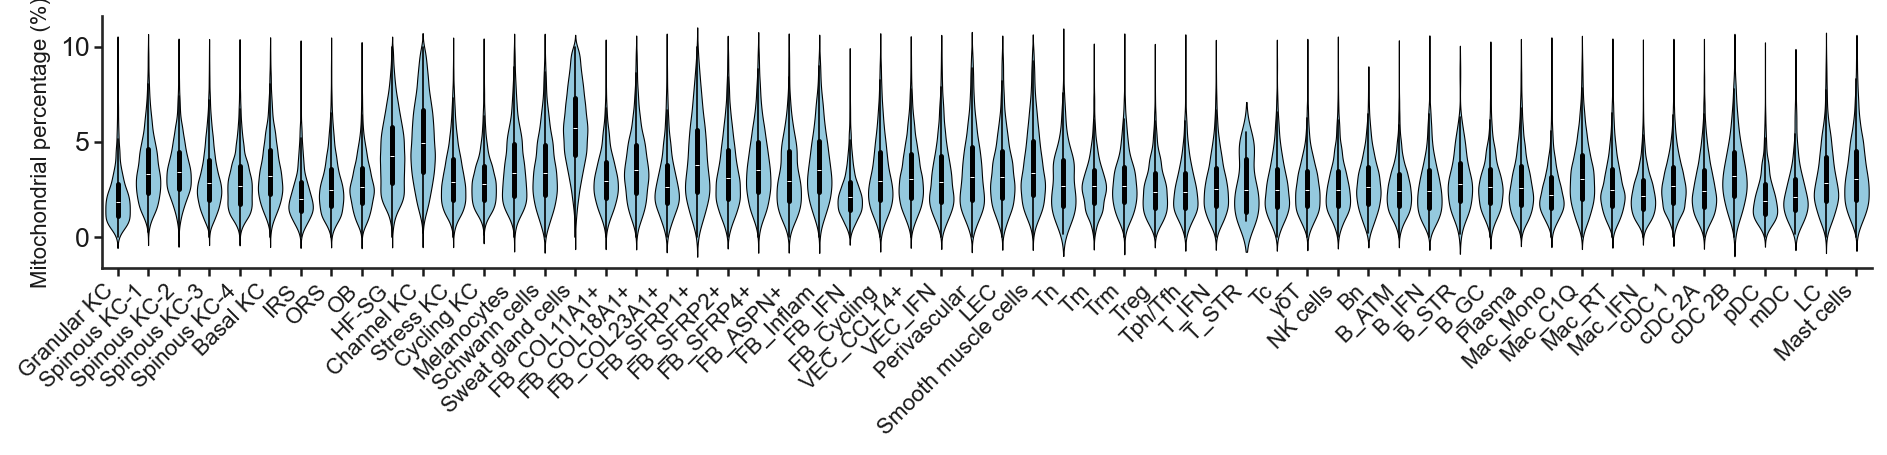

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
sns.violinplot(
    data=metadata_filter,
    x="subtype",
    y="pct_counts_MT",
    density_norm="width",
    color="skyblue",
    linewidth=0.5,
    edgecolor="black",
    ax=ax
)

ax.set_ylabel("Mitochondrial percentage (%)", fontsize=10)
ax.set_xlabel("", fontsize=10) 
plt.xticks(rotation=45, ha='right',fontsize=10)
plt.tight_layout()
plt.show()

## S2D

[15:41:32] ❕  ssat is not registered, register now                                           ]8;id=807369;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=205626;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:41:33] ❕  ssat is not registered, register now                                           ]8;id=761570;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=369719;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:41:34] ❕  ssat is not registered, register now                                           ]8;id=985162;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=576396;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=548738;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=533536;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:41:35] ❕  ssat is not registered, register now                                           ]8;id=864502;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=198415;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:41:36] ❕  ssat is not registered, register now                                           ]8;id=201175;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=412901;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:41:38] ❕  ssat is not registered, register now                                           ]8;id=633474;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=718614;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:41:39] ❕  ssat is not registered, register now                                           ]8;id=535790;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=781126;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:41:40] ❕  ssat is not registered, register now                                           ]8;id=501466;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=881628;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:41:42] ❕  ssat is not registered, register now                                           ]8;id=246152;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=316078;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:41:43] ❕  ssat is not registered, register now                                           ]8;id=526015;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=330800;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:41:46] ❕  ssat is not registered, register now                                           ]8;id=71209;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=448643;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:41:47] ❕  ssat is not registered, register now                                           ]8;id=303097;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=634670;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:41:48] ❕  ssat is not registered, register now                                           ]8;id=611801;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=228050;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[15:41:50] ❕  ssat is not registered, register now                                           ]8;id=511053;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=637661;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

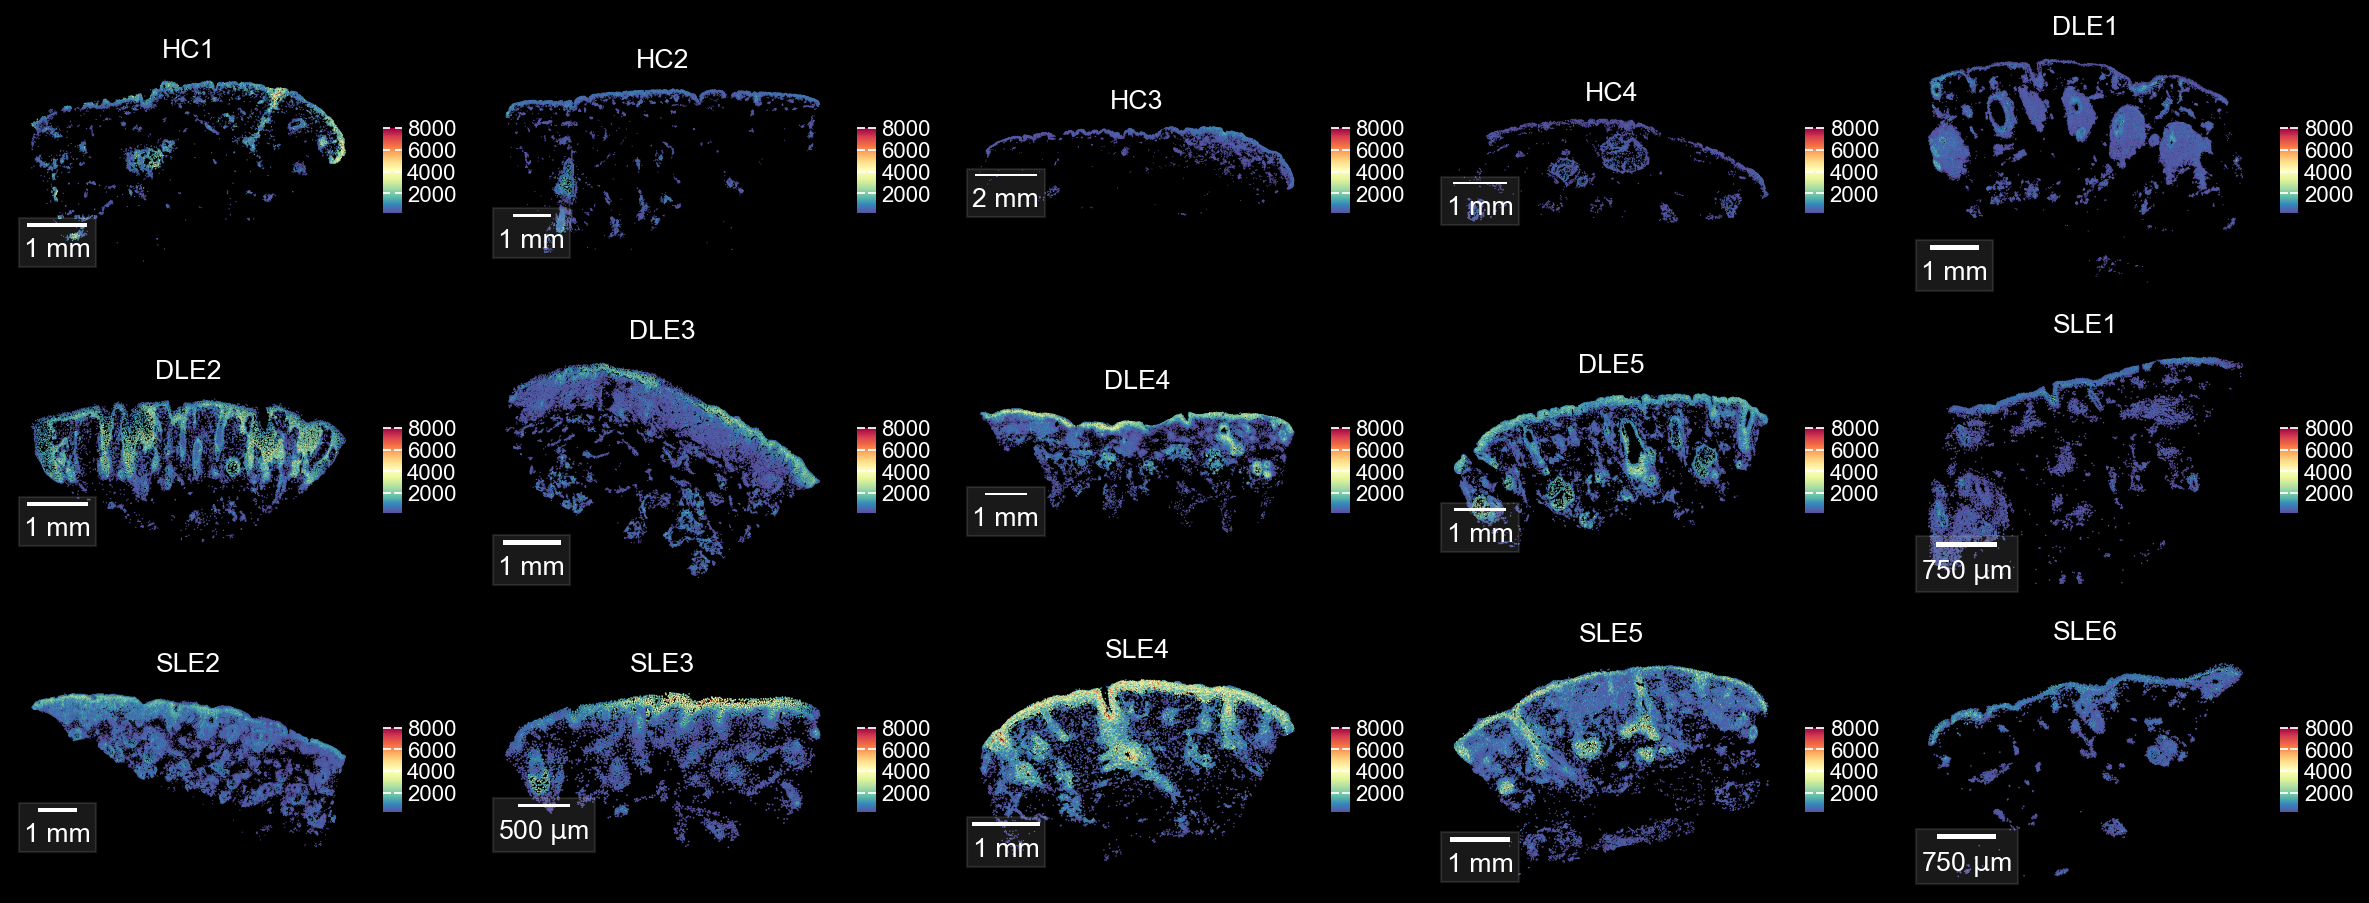

In [6]:
with mpl.style.context('dark_background'):
    fig, axs = plt.subplots(nrows=3,ncols=5,figsize=(15, 6))
    axs_flat = axs.flatten()
    for i, sample in enumerate(samples): 
        ax = axs_flat[i]
        
        sample_adata = ST_adata[ST_adata.obs['sample'] == sample]
        ax = featureplot(sample_adata, ['n_genes_by_counts'], reduction='spatial',ax=ax, dot_size=100, style="dark_background", vmax=8000)
        ax.set_title(sample, fontsize=12)
        draw_scalebar(ax=ax, color='white',location='lower left')
    #save_fig("../../figures/Cellbin_gene_number_spatial")